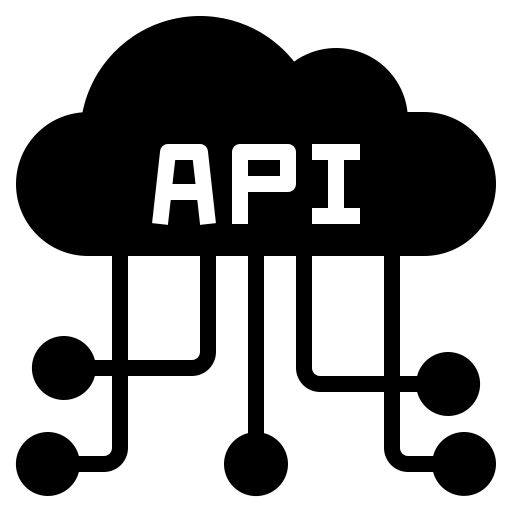

Queremos obtener los datos climáticos más recientes de una determinada dirección. Para ello, utilizaremos dos APIs:
1)	OpenWeather (https://openweathermap.org/): La API Current weather data proporciona información actual de ubicaciones, las cuales pueden ser nombres o códigos de ciudades, códigos postales, coordenadas geográficas...

2)	OpenCage (https://opencagedata.com/): Esta API permite transformar direcciones a coordenadas geográficas


Programar un código en Python que solicite al usuario introducir una dirección y devuelva la temperatura mínima, media y máxima (en grados centígrados) de dicha dirección, utilizando las dos APIs anteriores. Para ello:  

i)	Lee detenidamente la documentación de ambas APIs y obtén la autenticación en cada una de ellas.  
ii)	Transforma la dirección a coordenadas geográficas utilizando la API de OpenCage.  
iii)	Utiliza las coordenadas obtenidas en el paso anterior como parámetro para llamar a la API de OpenWeather y obtener  las temperaturas deseadas.   

PISTA: Las temperaturas por defecto se muestran en grados Kelvin, pero existe un parámetro de la API para cambiarlo.


In [33]:
import urllib.request
import json
import requests
import time

In [34]:
from opencage.geocoder import OpenCageGeocode

key = 'f991175b86104f63bb123db80f60b628'
geocoder = OpenCageGeocode(key)

address = input('Introduce una dirección: ')
query = address
results = geocoder.geocode(query)
# Consulto la estructura del Json con https://codebeautify.org/jsonviewer
latitud = results[0]['geometry']['lat']
longitud = results[0]['geometry']['lng']

Introduce una dirección: Paseo Hospital Militar Valladolid España


In [35]:
o_w_key = 'b02a11428d91d68b05fadcbb44722073'

endpoint='http://api.openweathermap.org/data/2.5/forecast?lat='+str(latitud)+'&lon='+str(longitud)+'&exclude=minutely,hourly,daily,alerts&units=metric&appid='+o_w_key

datos = requests.get(endpoint)

js = datos.json()

'''
for item in js['list']:
    print(item['dt_txt'])
    print(item['main']['temp'])
'''

"\nfor item in js['list']:\n    print(item['dt_txt'])\n    print(item['main']['temp'])\n"

In [37]:
ciudad = js['city']['name']
tempMin = js['list'][0]['main']['temp_min']
temp = js['list'][0]['main']['temp']
tempMax = js['list'][0]['main']['temp_max']
fechaHora = js['list'][0]['dt_txt']
fechaHora = fechaHora.split()
fecha = fechaHora[0]
hora = fechaHora[1][0:5]

print('La previsión de temperatura en',ciudad,'el dia',fecha,'a las',hora,'horas es de',temp,'ºC\n(Mínima',tempMin,'ºC y Máxima',tempMax,'ºC).')

La previsión de temperatura en Valladolid el dia 2022-11-01 a las 15:00 horas es de 15.37 ºC
(Mínima 15.37 ºC y Máxima 16.18 ºC).
